<a href="https://colab.research.google.com/github/Himank-J/ERAV2/blob/main/S5/S5_Himank_Jain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import sys
sys.path.append('/content')

In [14]:
import torch
import torch.optim as optim
import torch.nn.functional as F
from torchsummary import summary
from torchvision import datasets, transforms
from model import Net,Net2
from utils import *

In [15]:
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? False


In [16]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

In [17]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [18]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

512
512


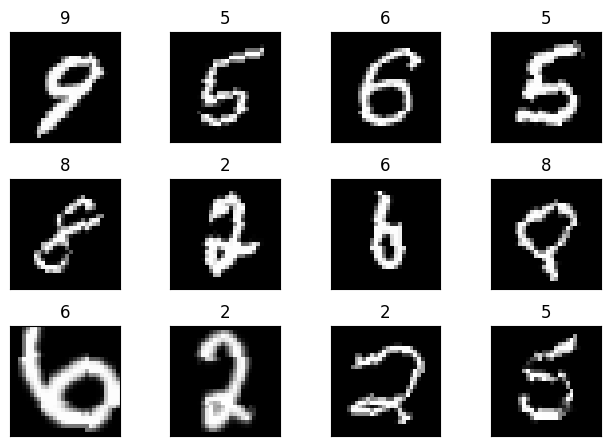

In [19]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))
print(len(batch_data))
print(len(batch_label))
fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [20]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


In [21]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []
test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [22]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc, train_losses = train(model, device, train_loader, optimizer, criterion, train_acc, train_losses)
  test_acc, test_losses = test(model, device, test_loader, criterion, test_acc, test_losses)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.4457 Batch_id=117 Accuracy=49.27: 100%|██████████| 118/118 [01:43<00:00,  1.14it/s]


Test set: Average loss: 0.2243, Accuracy: 9325/10000 (93.25%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.3882 Batch_id=117 Accuracy=93.99: 100%|██████████| 118/118 [02:40<00:00,  1.36s/it]


Test set: Average loss: 0.0842, Accuracy: 9739/10000 (97.39%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1240 Batch_id=117 Accuracy=96.45: 100%|██████████| 118/118 [02:08<00:00,  1.09s/it]


Test set: Average loss: 0.0666, Accuracy: 9794/10000 (97.94%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0720 Batch_id=117 Accuracy=97.19: 100%|██████████| 118/118 [02:26<00:00,  1.24s/it]


Test set: Average loss: 0.0501, Accuracy: 9836/10000 (98.36%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0518 Batch_id=117 Accuracy=97.58: 100%|██████████| 118/118 [05:07<00:00,  2.61s/it]


Test set: Average loss: 0.0456, Accuracy: 9860/10000 (98.60%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.1113 Batch_id=117 Accuracy=97.89: 100%|██████████| 118/118 [01:53<00:00,  1.04it/s]


Test set: Average loss: 0.0401, Accuracy: 9870/10000 (98.70%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0083 Batch_id=117 Accuracy=98.11: 100%|██████████| 118/118 [01:43<00:00,  1.14it/s]


Test set: Average loss: 0.0308, Accuracy: 9898/10000 (98.98%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0260 Batch_id=117 Accuracy=98.28: 100%|██████████| 118/118 [01:46<00:00,  1.11it/s]


Test set: Average loss: 0.0322, Accuracy: 9899/10000 (98.99%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0259 Batch_id=117 Accuracy=98.50: 100%|██████████| 118/118 [01:44<00:00,  1.13it/s]


Test set: Average loss: 0.0340, Accuracy: 9894/10000 (98.94%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0753 Batch_id=117 Accuracy=98.49: 100%|██████████| 118/118 [01:49<00:00,  1.07it/s]


Test set: Average loss: 0.0291, Accuracy: 9902/10000 (99.02%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0754 Batch_id=117 Accuracy=98.61: 100%|██████████| 118/118 [03:15<00:00,  1.65s/it]


Test set: Average loss: 0.0310, Accuracy: 9893/10000 (98.93%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0399 Batch_id=117 Accuracy=98.76: 100%|██████████| 118/118 [02:25<00:00,  1.23s/it]


Test set: Average loss: 0.0276, Accuracy: 9904/10000 (99.04%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0449 Batch_id=117 Accuracy=98.74: 100%|██████████| 118/118 [02:07<00:00,  1.08s/it]


Test set: Average loss: 0.0276, Accuracy: 9910/10000 (99.10%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0259 Batch_id=117 Accuracy=98.83: 100%|██████████| 118/118 [02:12<00:00,  1.13s/it]


Test set: Average loss: 0.0255, Accuracy: 9909/10000 (99.09%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0247 Batch_id=117 Accuracy=98.91: 100%|██████████| 118/118 [02:44<00:00,  1.39s/it]


Test set: Average loss: 0.0239, Accuracy: 9917/10000 (99.17%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0039 Batch_id=117 Accuracy=99.16: 100%|██████████| 118/118 [02:20<00:00,  1.19s/it]


Test set: Average loss: 0.0205, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0045 Batch_id=117 Accuracy=99.20: 100%|██████████| 118/118 [02:23<00:00,  1.21s/it]


Test set: Average loss: 0.0216, Accuracy: 9924/10000 (99.24%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0200 Batch_id=117 Accuracy=99.21: 100%|██████████| 118/118 [02:21<00:00,  1.20s/it]


Test set: Average loss: 0.0202, Accuracy: 9936/10000 (99.36%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0149 Batch_id=117 Accuracy=99.16: 100%|██████████| 118/118 [02:22<00:00,  1.21s/it]


Test set: Average loss: 0.0200, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0185 Batch_id=117 Accuracy=99.23: 100%|██████████| 118/118 [02:21<00:00,  1.20s/it]


Test set: Average loss: 0.0203, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-03.


Text(0.5, 1.0, 'Test Accuracy')

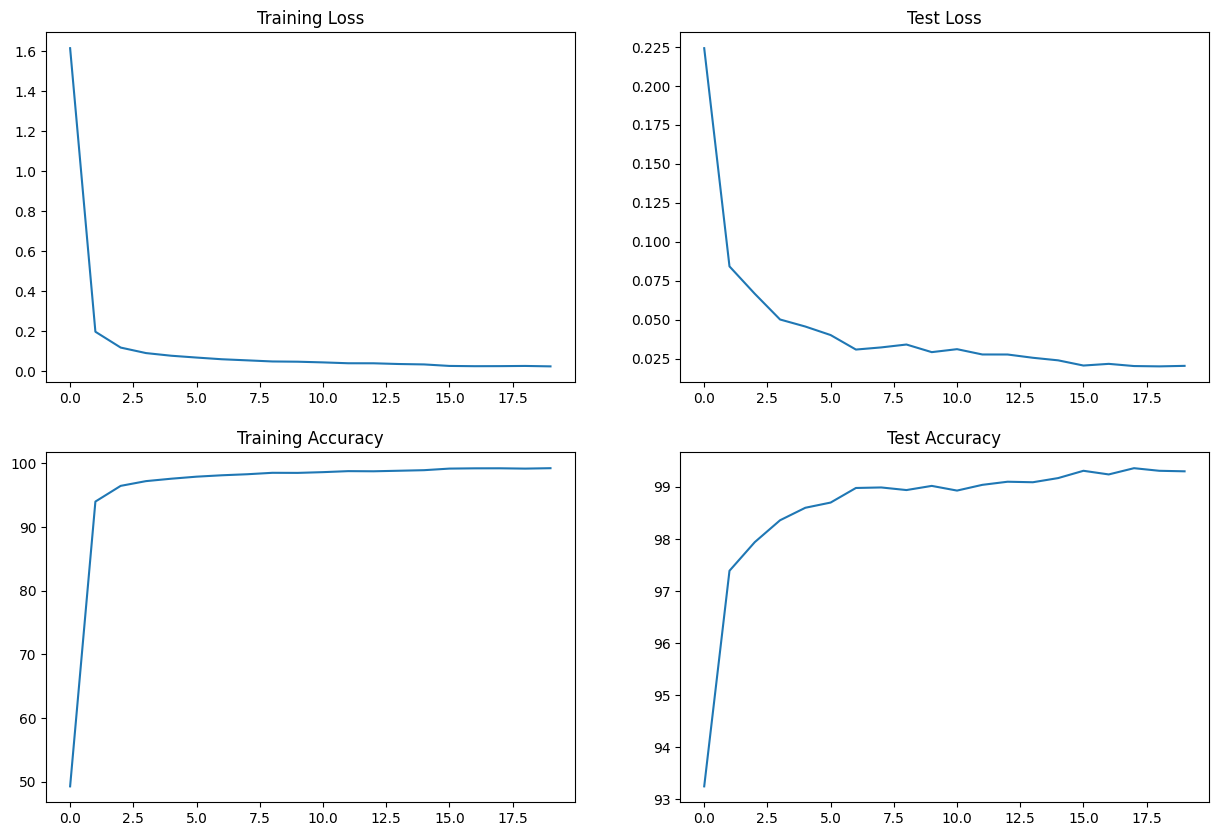

In [23]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")